# 1st Main Kernel - Start Here : A Gentle Introduction

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder

# File system management
import os

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print(os.listdir())

['.ipynb_checkpoints', 'application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'kaggle_study_12_9.ipynb', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv', 'Untitled.ipynb']


In [3]:
# Training Data
app_train = pd.read_csv('application_train.csv')

In [4]:
print('Training data shape', app_train.shape)
app_train.head()

Training data shape (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
app_test = pd.read_csv('application_test.csv')
print('Testing data shape : ', app_test.shape)
app_test.head()

Testing data shape :  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


### 데이터셋의 특정 칼럼에서 값(value)의 종류, 그 값이 몇개가 있는지 요약통계 함수 : value_counts()
### value_counts() 함수가 테이블로 결과를 보여준다면, 그래프 중 히스토그램을 이용하여 그 값이 몇개가 있는지 나타내주는 함수 : df['column'].plot.hist()

In [6]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

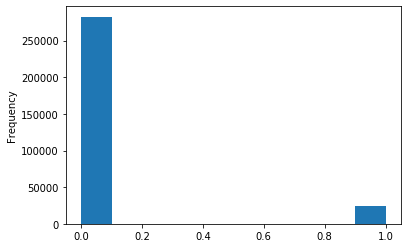

In [7]:
app_train['TARGET'].plot.hist();

### 결측치 테이블 만들기
#### 다섯번째 mis_val_table_ren_columns 변수에서 결측치 수가 0인 칼럼은 제외하고 sort해 주는 걸 알 수 있다.
#### columns.round(n) : 소수점 아래 n번째까지 나타내며 n+1번째에서 반올림하게 된다.  

In [8]:
# Function to calculate missing value by column# Funct
def missing_values_table(df):
    # total missing value
    mis_val = df.isnull().sum()
    
    # percentage of missing value
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis = 1)
    
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending = False).round(1)
    
    # print some summary information
    print('Your selected dataframe has ' + str(df.shape[1]) + ' columns.\n'
         'There are ' + str(mis_val_table_ren_columns.shape[0]) + 
         ' columns that have missing values')
    
    return mis_val_table_ren_columns

In [9]:
missing_values = missing_values_table(app_train)
missing_values

Your selected dataframe has 122 columns.
There are 67 columns that have missing values


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [10]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [15]:
# Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

### unique()와 nunique()의 차이
#### column.unique()는 column의 유일한 값들을 array 형태로 나타내는 함수고 column.nunique()는 column의 유일한 값들의 개수를 int 형태로 나타내는 함수다.
#### 둘의 가장 큰 차이점은 unique() 함수는 NaN을 포함하여 보여주는 반면에, nuique() 함수는 NaN을 제외한 유일한 값들의 개수를 보여주는 것이다.
#### 아래의 label encoder와 one-hot encoder 셀에서 9번째 줄을 보면 nunique()함수를 사용하지 않고 len(list(app_train[col].unique())) 함수를 사용하는 것을 알 수 있다.
#### 이는 category 형 변수 16개 중 마지막 EMERGENCYSTATE_MODE 변수가 NaN을 포함하여 (no, NaN, yes)형태의 값을 갖고 있는데 위에서 nunique()함수에서는 NaN이 제외되어 2가 계산되었다.
#### 하지만 11번째 줄에서 le.fit(app_train[col]) 명령어를 보면 le.fit 함수는 string이나 numeric 형 변수만 label encoding이 가능하기 때문에 (no, NaN, yes) 값을 가지는 EMERGENCYSTATE_MODE 변수는 label encoding이 불가능하다. 따라서 이 변수를 걸러내기 위해 nunique() 대신 unique() 함수를 사용해 len()함수를 이용한 길이 계산을 사용한 것이다.

In [48]:
len(list(app_train['EMERGENCYSTATE_MODE'].unique()))

3

In [44]:
app_train['EMERGENCYSTATE_MODE'].nunique()

2

### 만약 unique() 함수처럼 쓰고 싶다면 nunique(dropna = False)로 옵션을 주어 사용 가능하다.

In [45]:
app_train['EMERGENCYSTATE_MODE'].nunique(dropna = False)

3

In [49]:
print(len(list(app_train['EMERGENCYSTATE_MODE'].unique())))
print(app_train['EMERGENCYSTATE_MODE'].nunique())
print(app_train['EMERGENCYSTATE_MODE'].nunique(dropna = False))

3
2
3


## Label Encoder와 One-hot Encoder
#### 유일한 값 개수 2개 이하일 때는 Label Encoder를 사용, 3개 이상일 땐 One-hot Encoder를 사용했다.
#### 위 저자는 3개 이상의 범주형 변수인 경우 one-hot encoding이 더 안전한 방법이라고 소개한다. 그 이유는 label encoding은 0부터 n까지의 숫자로 라벨을 정하게 되는데 사실 라벨들 간의 간격은 모두 동일하고 모두 랜덤이기 때문에 모델 생성시 숫자 크기로 인한 차이가 발생할 수 있기 때문이다. 그러므로 모두 0과 1로 표기하는 one-hot encoding이 더 안전한 방법이라 소개하고 있다.
#### 그래서 유일한 값 개수가 2개 이하일 때는 0과 1만을 사용하므로 label encoder를 사용해도 무방하기 때문에 one-hot encoding으로 불필요하게 column을 늘릴 필요가 없어진다. 하지만 그 외 3개 이상의 값을 가지는 변수는 one-hot encoding으로 안전하게 범주형 변수를 구분해주는 것이 좋다.

In [41]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique caategories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded. ' % le_count)

0 columns were label encoded. 


# 1st FOLLOW-UP kernel - Manual Feature Engineering Part One 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')

## 데이터 불러오기

In [2]:
bureau = pd.read_csv('bureau.csv')
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [17]:
bureau.groupby(['CREDIT_ACTIVE'])['CREDIT_ACTIVE'].count()

CREDIT_ACTIVE
Active       630607
Bad debt         21
Closed      1079273
Sold           6527
Name: CREDIT_ACTIVE, dtype: int64

In [18]:
bureau.groupby(['CREDIT_CURRENCY'])['CREDIT_CURRENCY'].count()

CREDIT_CURRENCY
currency 1    1715020
currency 2       1224
currency 3        174
currency 4         10
Name: CREDIT_CURRENCY, dtype: int64